# **Customer Segmentation for More Effective Retargeting Campaign**
Created by : **Lana Fuadi**
<br>LinkedIn   : https://www.linkedin.com/in/lanafuadi/
<br>GitHub : https://github.com/lanafuadi

### BACKGROUND

As a Data Science intern working with the Inventory Team at Kalbe Nutritionals, my project involves using ARIMA (AutoRegressive Integrated Moving Average) forecasting to predict daily product sales. The Inventory Team faces challenges in accurately anticipating daily demand, which often leads to inefficient stock management and potential stockouts. The primary objective of this project is to develop ARIMA models based on historical sales data to forecast future daily product sales accurately. By leveraging these forecasts, the Inventory Team will be equipped to optimize inventory levels, ensure sufficient stock availability, and minimize carrying costs. Ultimately, this ARIMA forecasting project aims to enhance the Inventory Team's decision-making processes, leading to improved inventory management, reduced stock-related issues, and increased overall efficiency in the company's supply chain.

## LOAD DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [143]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
data = dataset.copy()

## DATA PREPARATION

In [4]:
info_data = pd.DataFrame({'Missing Values' : data.isnull().sum(),
                          '% Missing'      : round(data.isnull().mean()*100),
                          'Unique Values'  : data.nunique(),
                          'Data Type'      : data.dtypes})
info_data = info_data.sort_values(by='Missing Values', ascending=False)
info      = info_data.reset_index(names='Feature')
info

,Feature,Missing Values,% Missing,Unique Values,Data Type
0,Marital Status,44,1.0,2,object
1,customerid,0,0.0,447,int64
2,totalamount,0,0.0,44,int64
3,longitude,0,0.0,14,object
4,latitude,0,0.0,14,object
5,Type,0,0.0,2,object
6,groupstore,0,0.0,7,object
7,storename,0,0.0,12,object
8,storeid,0,0.0,14,int64
9,qty,0,0.0,10,int64


In [5]:
dataset.head()

,customerid,age,gender,Marital Status,income,transactionid,Date,productid,price,qty,totalamount,storeid,storename,groupstore,Type,latitude,longitude,Product Name
0,328,36,0,Married,"10,53",TR11369,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers
1,165,44,1,Married,"14,58",TR16356,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt
2,183,27,1,Single,"0,18",TR1984,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar
3,160,48,1,Married,"12,57",TR35256,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar
4,386,33,0,Married,"6,95",TR41231,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt


## DATA PRE-PROCESSING

### Drop Unnecesary Features

In [148]:
# data.drop(['customerid', 'age', 'gender', 'Marital Status', 'income', 'transactionid', 'productid', 'price', 'totalamount',
#           'storeid', 'storename', 'groupstore', 'Type', 'latitude', 'longitude', 'Product Name'], axis=1, inplace=True)

ARIMA is a time-series forecasting model that is primarily used to predict future values based on past observations.
<br>When applying ARIMA to the given dataset, the most relevant features to consider are: Date and qty.
<br>Other features in the dataset, such as 'customerid', 'age', 'gender', 'Marital Status', 'income', 'transactionid', 'productid', 'price',
<br>'totalamount', 'storeid', 'storename', 'groupstore', 'Type', 'latitude', 'longitude', and 'Product Name', are not directly related to the  ARIMA.

### Feature Encoding

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
datafore = data.groupby(['Date']).agg({'qty': 'sum'}).reset_index()

In [15]:
datafore

,Date,qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


## MODELING

### Trend, Seasonal, and Residual

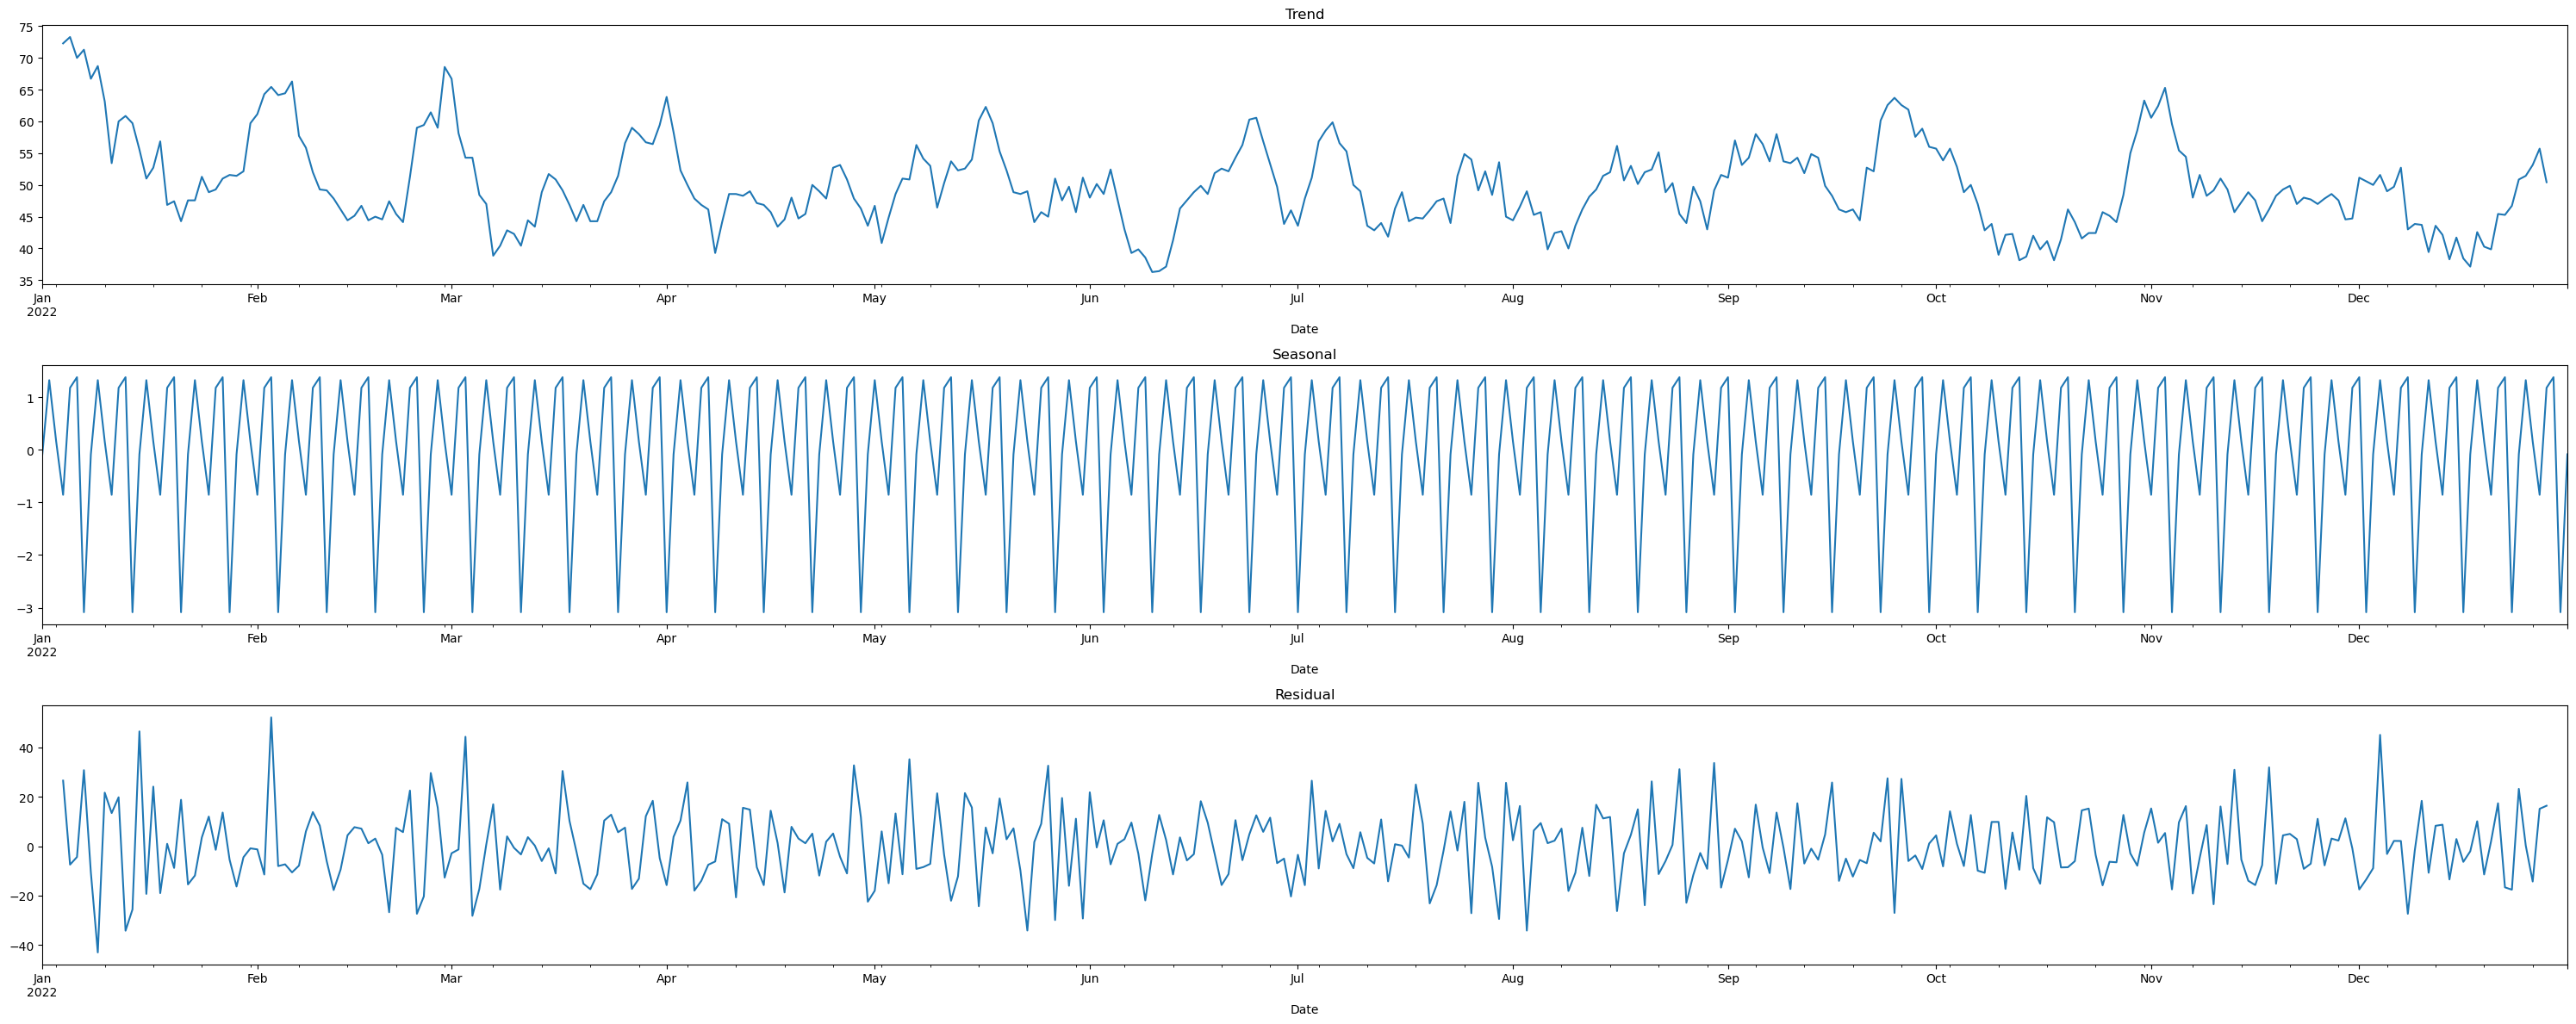

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(datafore.set_index('Date'))
fig,ax    = plt.subplots(3,1,figsize=(30,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

### Data Splitting

In [17]:
cut_off  = round(datafore.shape[0] * 0.9)
df_train = datafore.iloc[:cut_off]
df_test  = datafore.iloc[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((328, 2), (37, 2))

<AxesSubplot: xlabel='Date', ylabel='qty'>

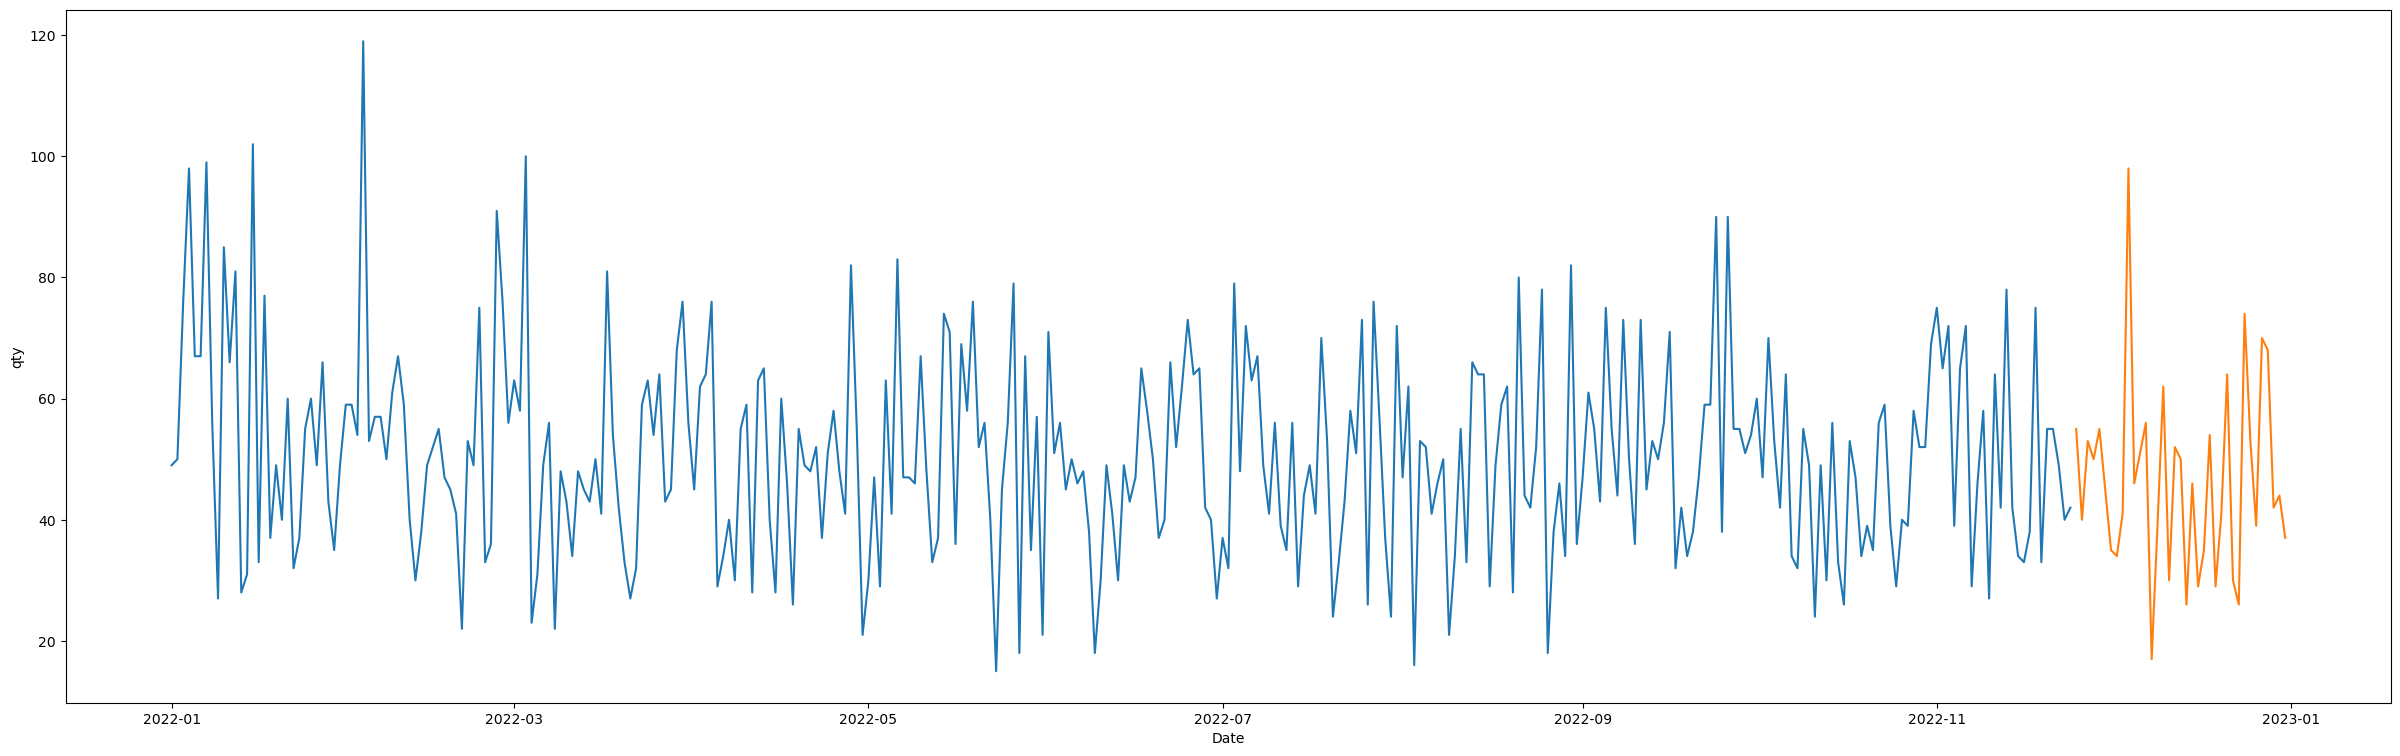

In [18]:
plt.figure(figsize=(30,9))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['qty'])
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['qty'])

### Stationary, Dickey Fuller

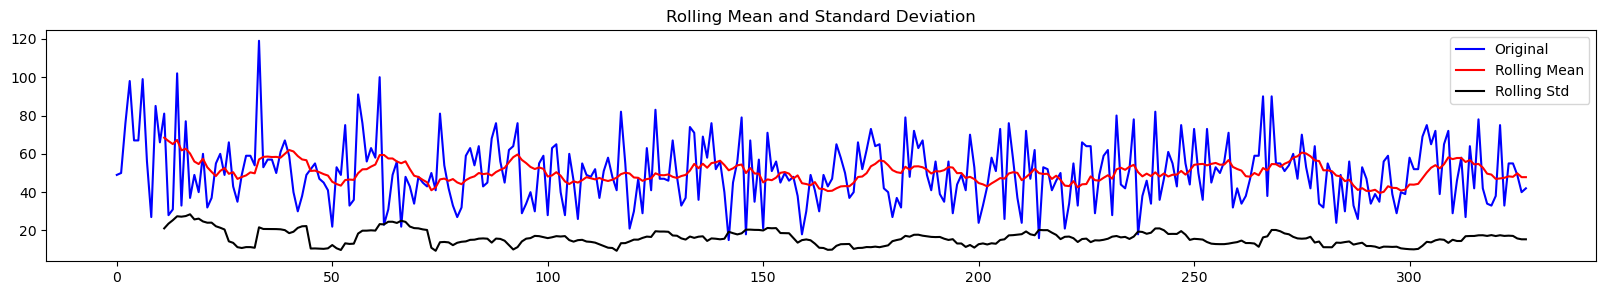

Results of Dickey Fuller Test
1. ADF :  -17.978890673541247
2. P-Value :  2.779206321430101e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 327
5. Critical Values :
	 1% :  -3.45050711373316
	 5% :  -2.8704195794076743
	 10% :  -2.571500856923753


In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,3))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    dftest = adfuller(timeseries, autolag='AIC')

    print("Results of Dickey Fuller Test")
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
      print("\t",key, ": ", val)

test_stationarity(df_train['qty'])

### Autocorrelation Plot

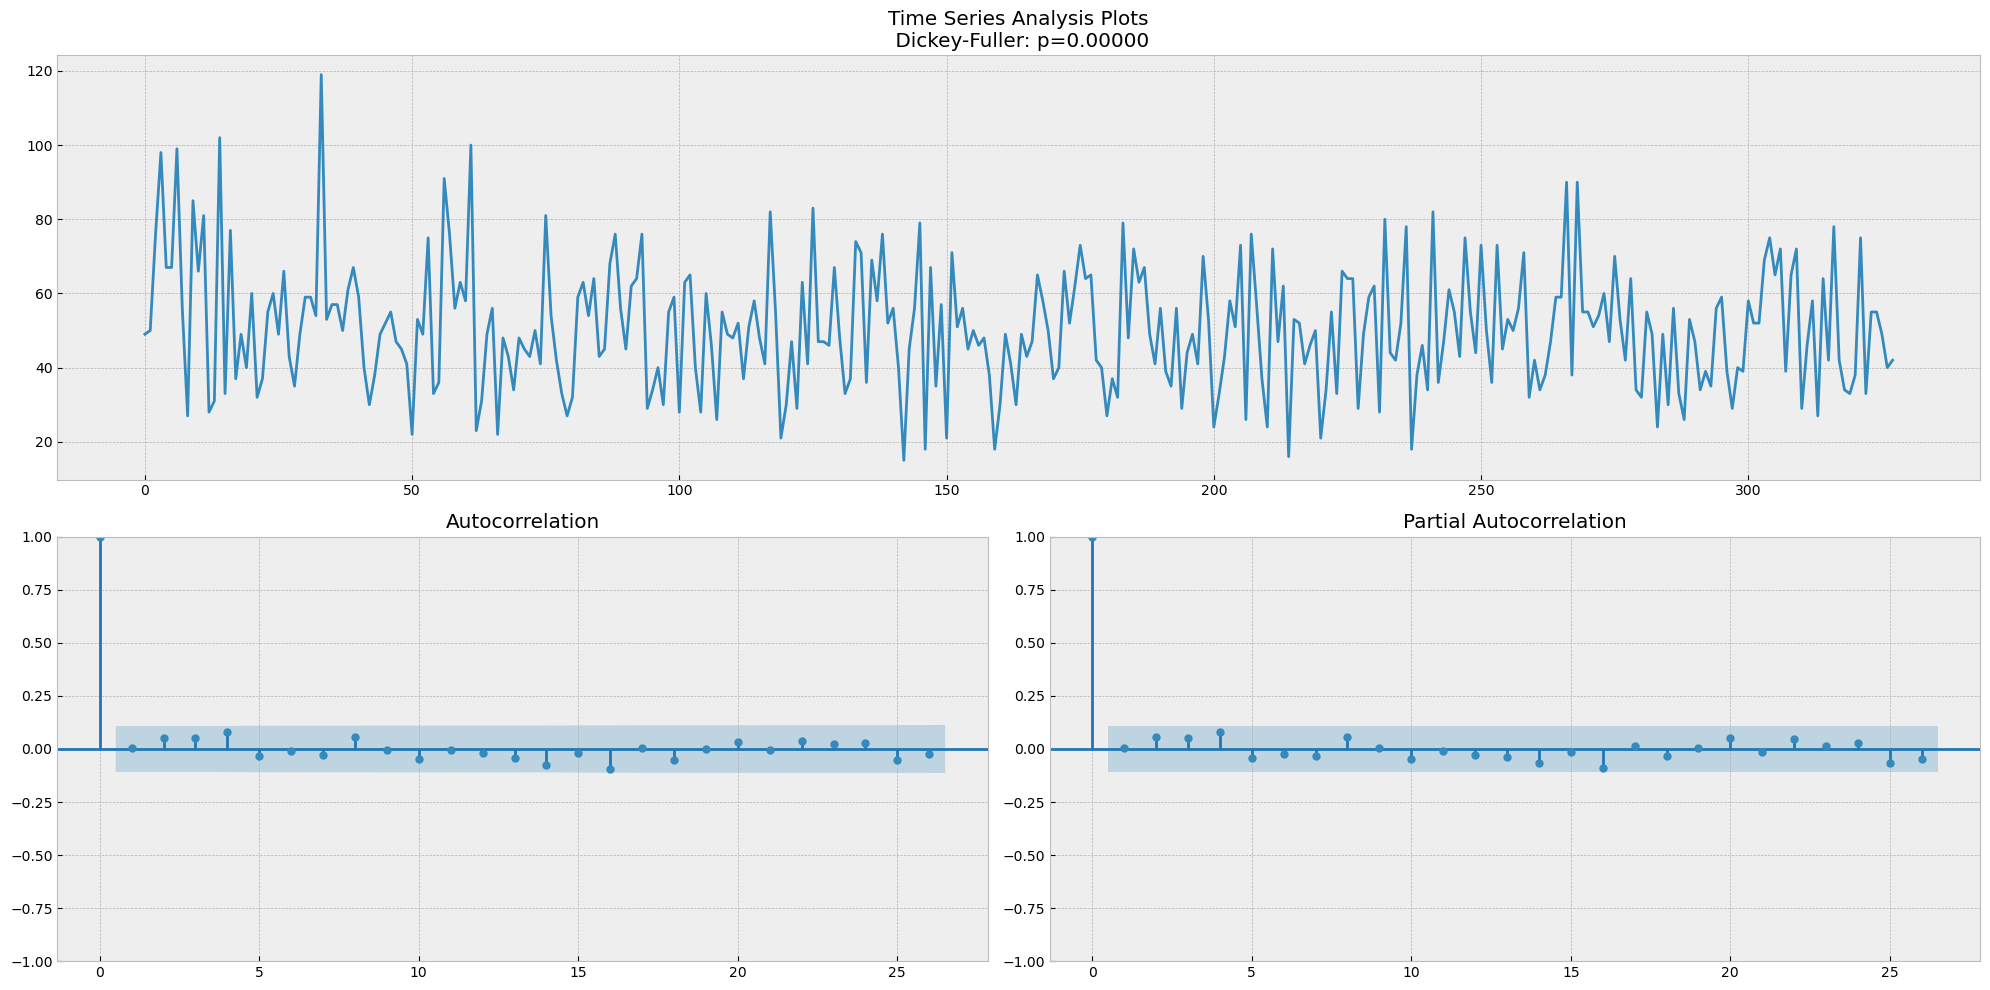

In [22]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

def tsplot(y, lags=None, figsize=(20,10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

tsplot(df_train['qty'])

c:\Users\lanafuadi\anaconda3\envs\works\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


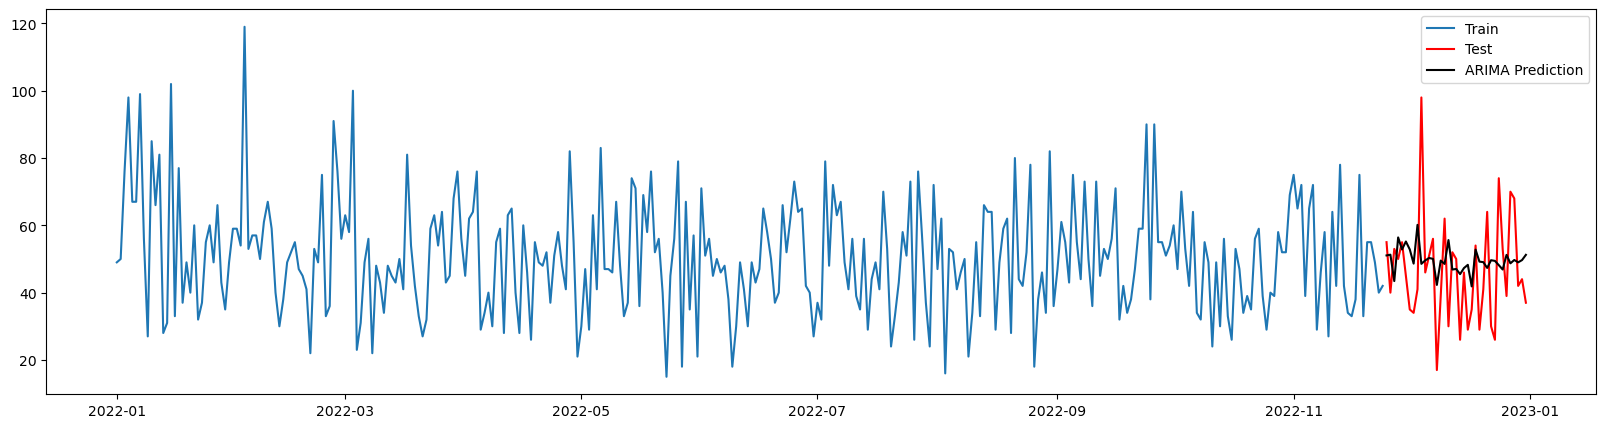

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_train and df_test are your DataFrames with the 'Date' column already set as the index.
df_train.index = pd.to_datetime(df_train.index)
df_train.index.freq = 'D'  # Set the frequency to daily

df_test.index = pd.to_datetime(df_test.index)
df_test.index.freq = 'D'  # Set the frequency to daily

# Now, you can proceed with the ARIMA forecast
y = df_train['qty']

ARIMAmodel = ARIMA(y, order=(30, 2, 1))
ARIMAfit = ARIMAmodel.fit()

y_pred = ARIMAfit.get_prediction(start=df_test.index[0], end=df_test.index[-1], dynamic=False)
y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = y_pred.predicted_mean
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

# Continue with plotting
plt.figure(figsize=(20, 5))
plt.plot(df_train['qty'], label='Train')
plt.plot(df_test['qty'], label='Test', color='r')
plt.plot(y_pred_out, label='ARIMA Prediction', color='black')
plt.legend()
plt.show()

In [34]:
datafore.head()

,Date,qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [41]:
from statsmodels.tsa.arima.model import ARIMA

list_prod = data['Product Name'].unique()

dfp = pd.DataFrame({'Date': pd.date_range(start='2023-01-01', end='2023-01-10')})
dfp = dfp.set_index('Date')

for i in list_prod:
    df_ = data[data['Product Name'] == i]
    df_ = df_.groupby('Date')[['qty']].sum()
    
    df_t = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', end='2022-12-31')})
    df_t = df_t.merge(df_, how='left', on='Date')
    df_t = df_t.fillna(0)
    df_t = df_t.set_index('Date')
    df_t.index.freq = 'D'  # Set the frequency explicitly to 'D' (daily) for df_t
    
    # For separate ARIMA modeling:
    try:
        model1 = ARIMA(df_t['qty'], order=(10, 2, 1))
        model_fit1 = model1.fit(start_params=None)  # Try different initial parameters if needed
        forecast1 = model_fit1.forecast(steps=10)
        dfp[i] = forecast1.values
    except Exception as e:
        print(f"ARIMA failed for product '{i}': {e}")
        continue
    
dfp.head()

c:\Users\lanafuadi\anaconda3\envs\works\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lanafuadi\anaconda3\envs\works\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lanafuadi\anaconda3\envs\works\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lanafuadi\anaconda3\envs\works\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lanafuadi\anaconda3\envs\works\

,Crackers,Yoghurt,Choco Bar,Cheese Stick,Oat,Thai Tea,Coffee Candy,Potato Chip,Ginger Candy,Cashew
Date,,,,,,,,,,
2023-01-01,6.227829,5.833042,5.392615,6.480114,2.805612,4.653659,6.901690,4.176921,6.081377,2.214782
2023-01-02,6.815191,4.477736,6.128017,5.525574,2.839310,4.173778,6.101384,3.772942,7.464871,2.264616
2023-01-03,7.651566,4.218694,5.033855,5.775986,3.047582,3.954718,6.072423,3.716151,7.025061,2.526295
2023-01-04,7.206926,4.631864,6.711405,6.730658,2.831090,4.573201,5.927447,3.777893,6.875242,2.315324
2023-01-05,7.455674,4.116643,5.191349,6.067434,3.036711,4.267859,7.089128,3.569677,8.014596,2.283888


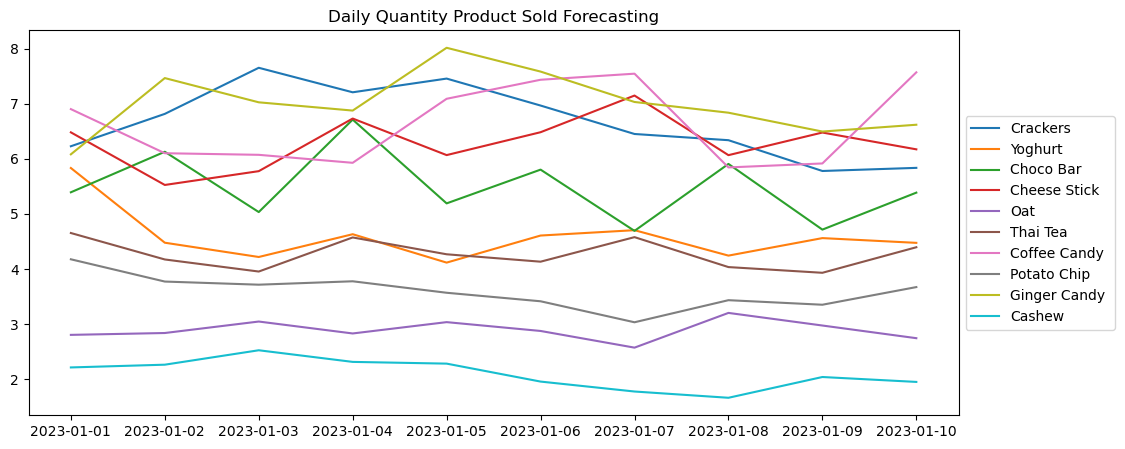

In [42]:
#Plot forecasting
plt.figure(figsize=(12,5))
# plt.plot(df_t)
plt.plot(dfp)
plt.legend(dfp.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Daily Quantity Product Sold Forecasting')
plt.show()

* Consider seasonal decomposition or separate ARIMA modeling for different product categories For seasonal decomposition:
* decompose = seasonal_decompose(df_t['qty'], period=seasonal_period)  # Set seasonal_period accordingly
* trend = decompose.trend
* seasonal = decompose.seasonal
* residual = decompose.resid
* Perform ARIMA modeling on the trend and residual (if needed).
* Add back the seasonal component and forecast for the future.